In [8]:
import gym
from skimage.transform import resize
import matplotlib.pyplot as plt

In [19]:
ACTION_SPACE_SIZE = 5

class DMWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.env = env
        self.action_space = gym.spaces.Discrete(ACTION_SPACE_SIZE)

    def step(self, action):
        s, r, done, info = self.env.step(action)
        if info['lives'] == 2:
            done = True
        s = resize(s, (110, 84), anti_aliasing=True)
        #s = []
        return s, r, done, info

    def reset(self):
        s = self.env.reset()
        for _ in range(65):
            self.env.step(0)
        s = resize(s, (110, 84), anti_aliasing=True)
        return s

(84, 84)


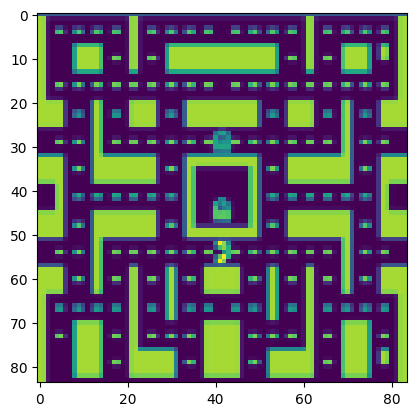

In [20]:
env = gym.make('ALE/MsPacman-v5',
               full_action_space=False,
               obs_type='grayscale',
               render_mode='human')
env = DMWrapper(env)

s = env.reset()
s = s[0:84, :]

print(s.shape)

plt.imshow(s)